<a href="https://colab.research.google.com/github/kaushaldeep7/python_fundamentals2/blob/main/Neural_Network_assingment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARTIFICIAL NEURAL NETWORKS

## Classification Using Artificial Neural Networks with Hyperparameter Tuning on Alphabets Data

Overview

In this assignment, you will be tasked with developing a classification model using Artificial Neural Networks (ANNs) to classify data points from the "Alphabets_data.csv" dataset into predefined categories of alphabets. This exercise aims to deepen your understanding of ANNs and the significant role hyperparameter tuning plays in enhancing model performance.

In [ ]:
 !pip install -q keras-tuner

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import keras_tuner as kt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import random as rn
import os
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


In [ ]:
# Load the dataset
data=pd.read_csv("/content/Alphabets_data.csv")

In [ ]:
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [ ]:
# Checking the shape of dataset
data.shape

(20000, 17)

In [ ]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [ ]:
# describe the data
data.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [ ]:
# checking any null values
data.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [ ]:
# checking any duplicated values
data.duplicated().sum()

1332

In [ ]:
# drop all the duplicate values
data1= data.drop_duplicates(keep=False)

In [ ]:
duplicates = data1.duplicated()
duplicates.value_counts()

False    17823
Name: count, dtype: int64

In [ ]:
data1.shape # checking the shape of data1

(17823, 17)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17823 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  17823 non-null  object
 1   xbox    17823 non-null  int64 
 2   ybox    17823 non-null  int64 
 3   width   17823 non-null  int64 
 4   height  17823 non-null  int64 
 5   onpix   17823 non-null  int64 
 6   xbar    17823 non-null  int64 
 7   ybar    17823 non-null  int64 
 8   x2bar   17823 non-null  int64 
 9   y2bar   17823 non-null  int64 
 10  xybar   17823 non-null  int64 
 11  x2ybar  17823 non-null  int64 
 12  xy2bar  17823 non-null  int64 
 13  xedge   17823 non-null  int64 
 14  xedgey  17823 non-null  int64 
 15  yedge   17823 non-null  int64 
 16  yedgex  17823 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.4+ MB


In [ ]:
data2 = data1.copy()

# Visualization of datas

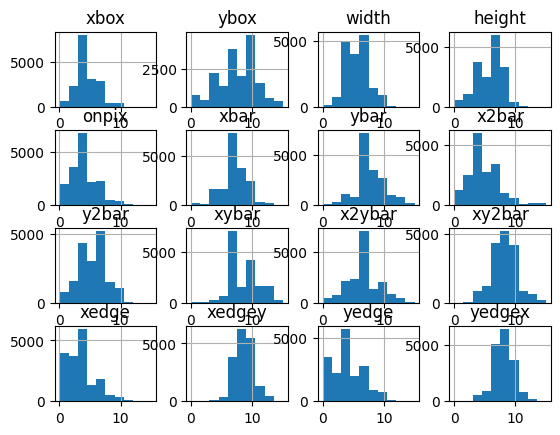

In [ ]:
# create the histogram
data2.hist()
plt.rcParams.update({'figure.figsize':(30,15),'figure.dpi':100})

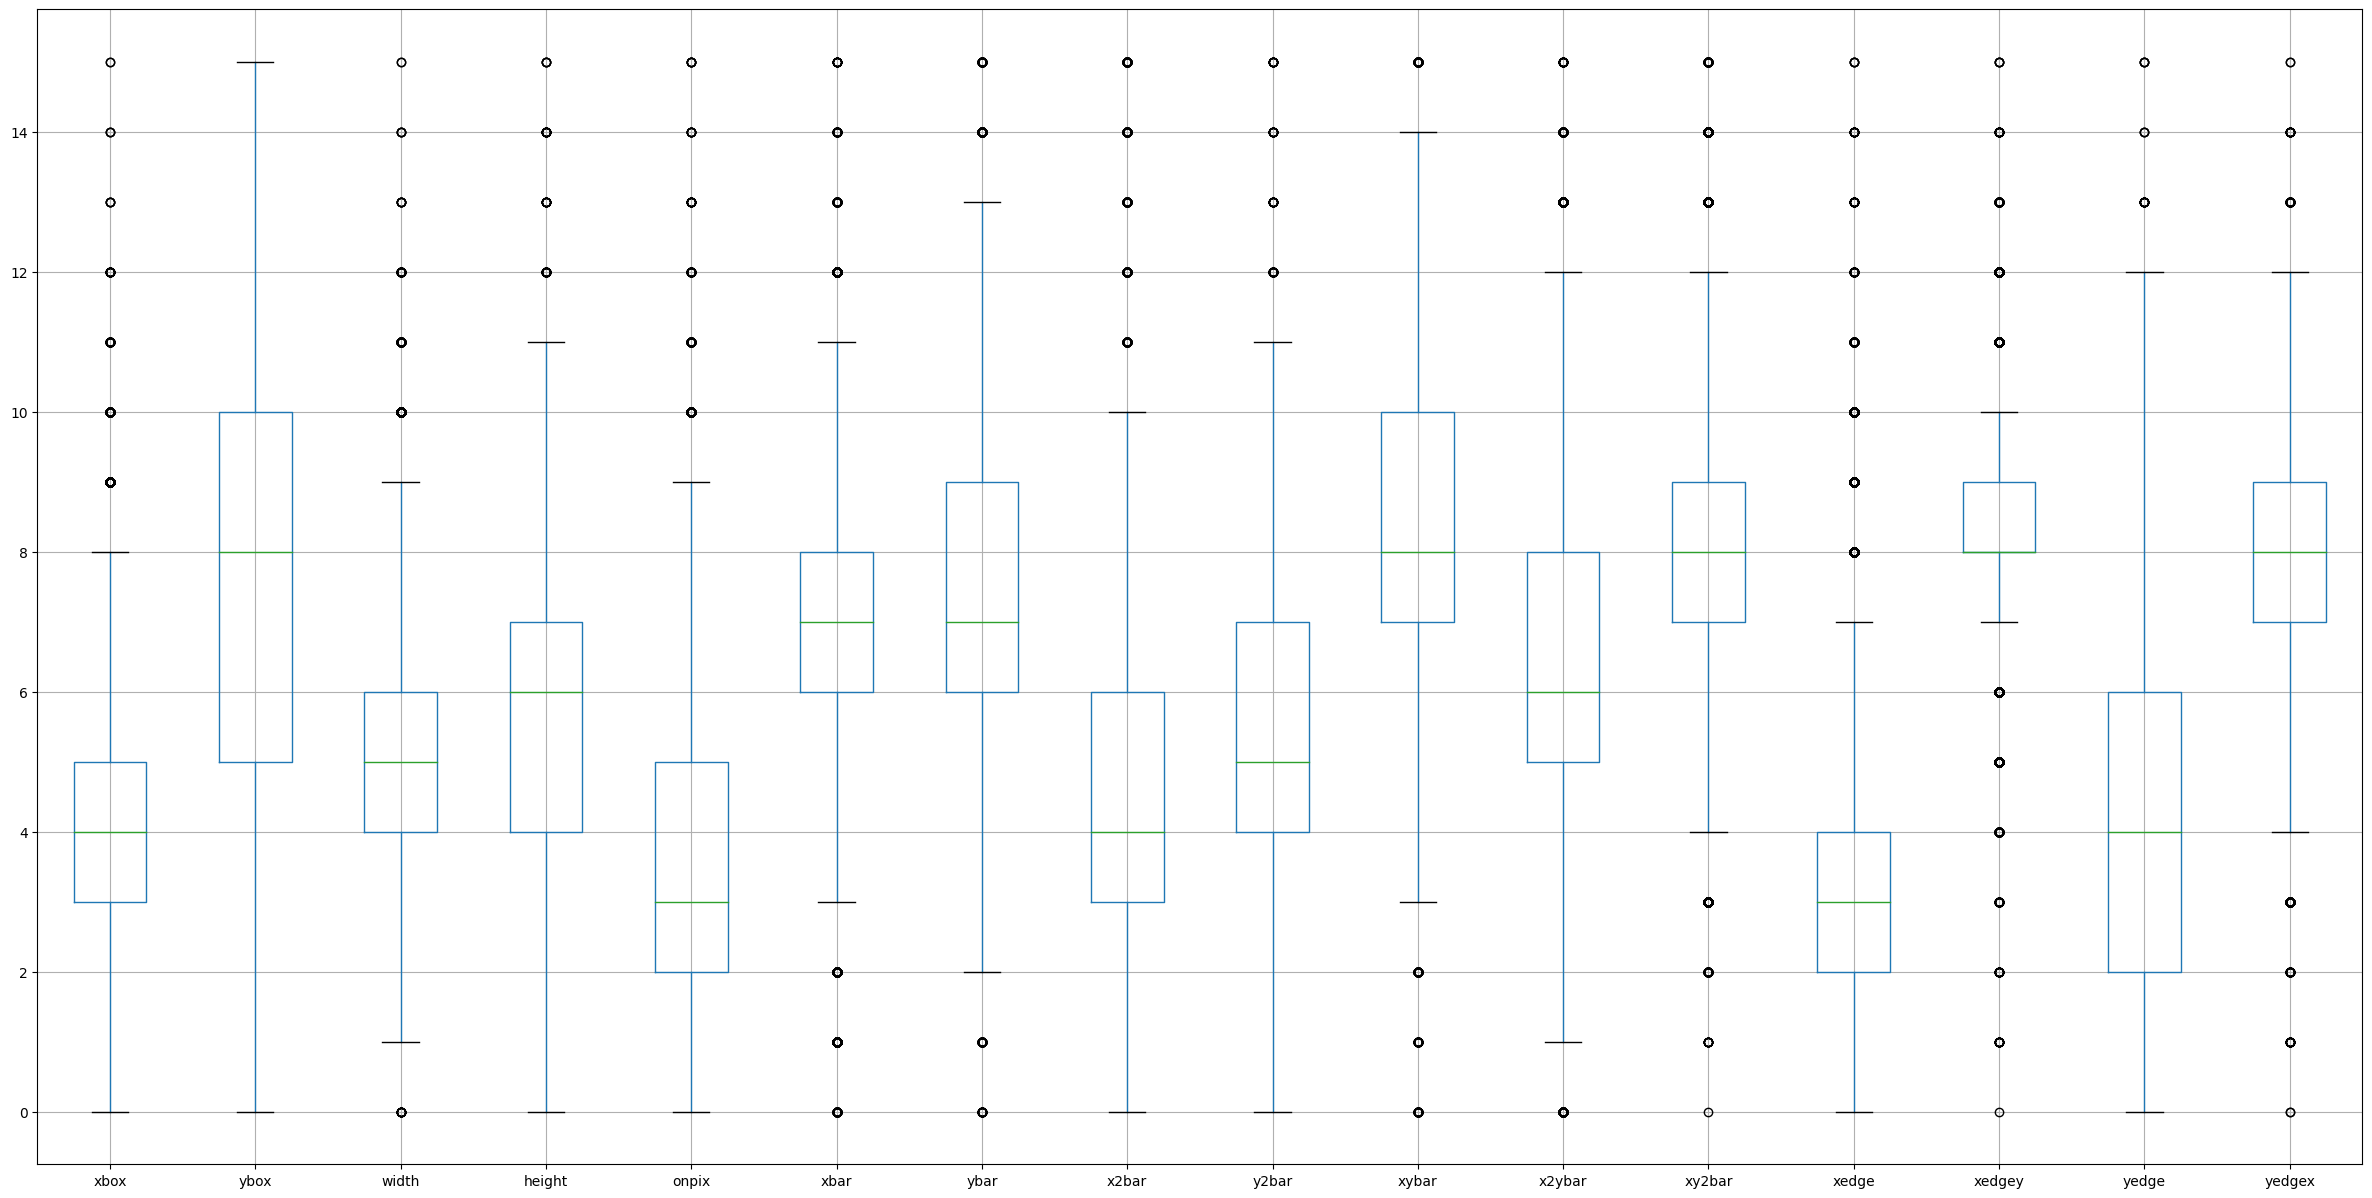

In [ ]:
# create the histogram
data2.boxplot()
plt.rcParams.update({'figure.figsize':(30,15),'figure.dpi':100})

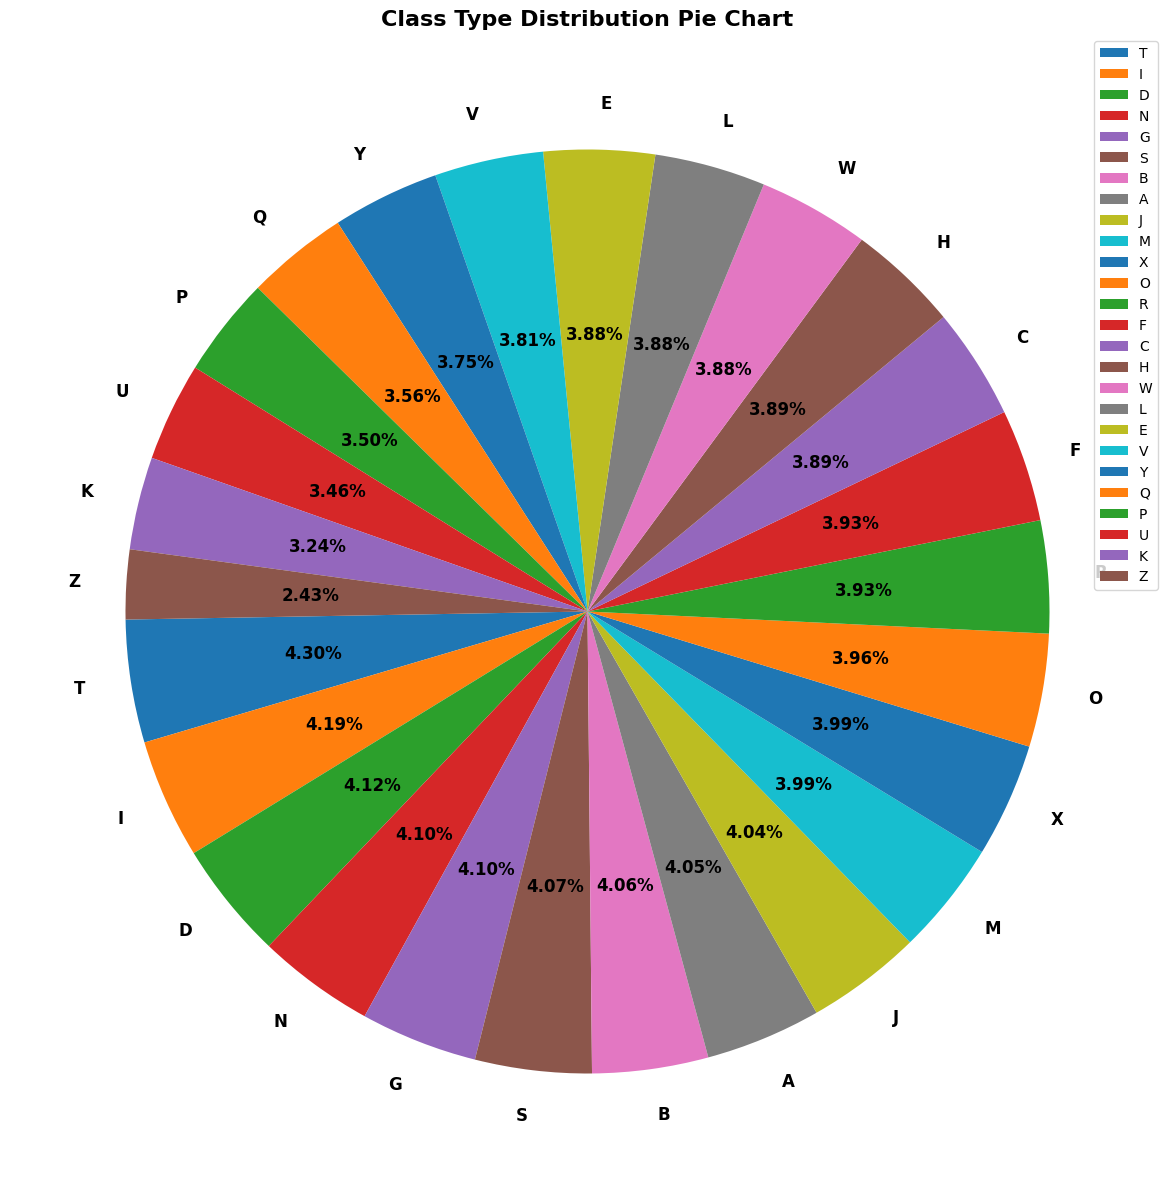

In [ ]:
# Create the pie chart for see the class type distribution
plt.figure(figsize=(30,15))
plt.pie(data2['letter'].value_counts(), labels=data2['letter'].unique(),autopct='%.2f%%',
        startangle=181, textprops={'size': 'large', 'fontweight': 'bold', 'color': 'black'})
plt.legend(loc='upper right')
plt.title('Class Type Distribution Pie Chart', fontsize=16, fontweight='bold')
plt.show()

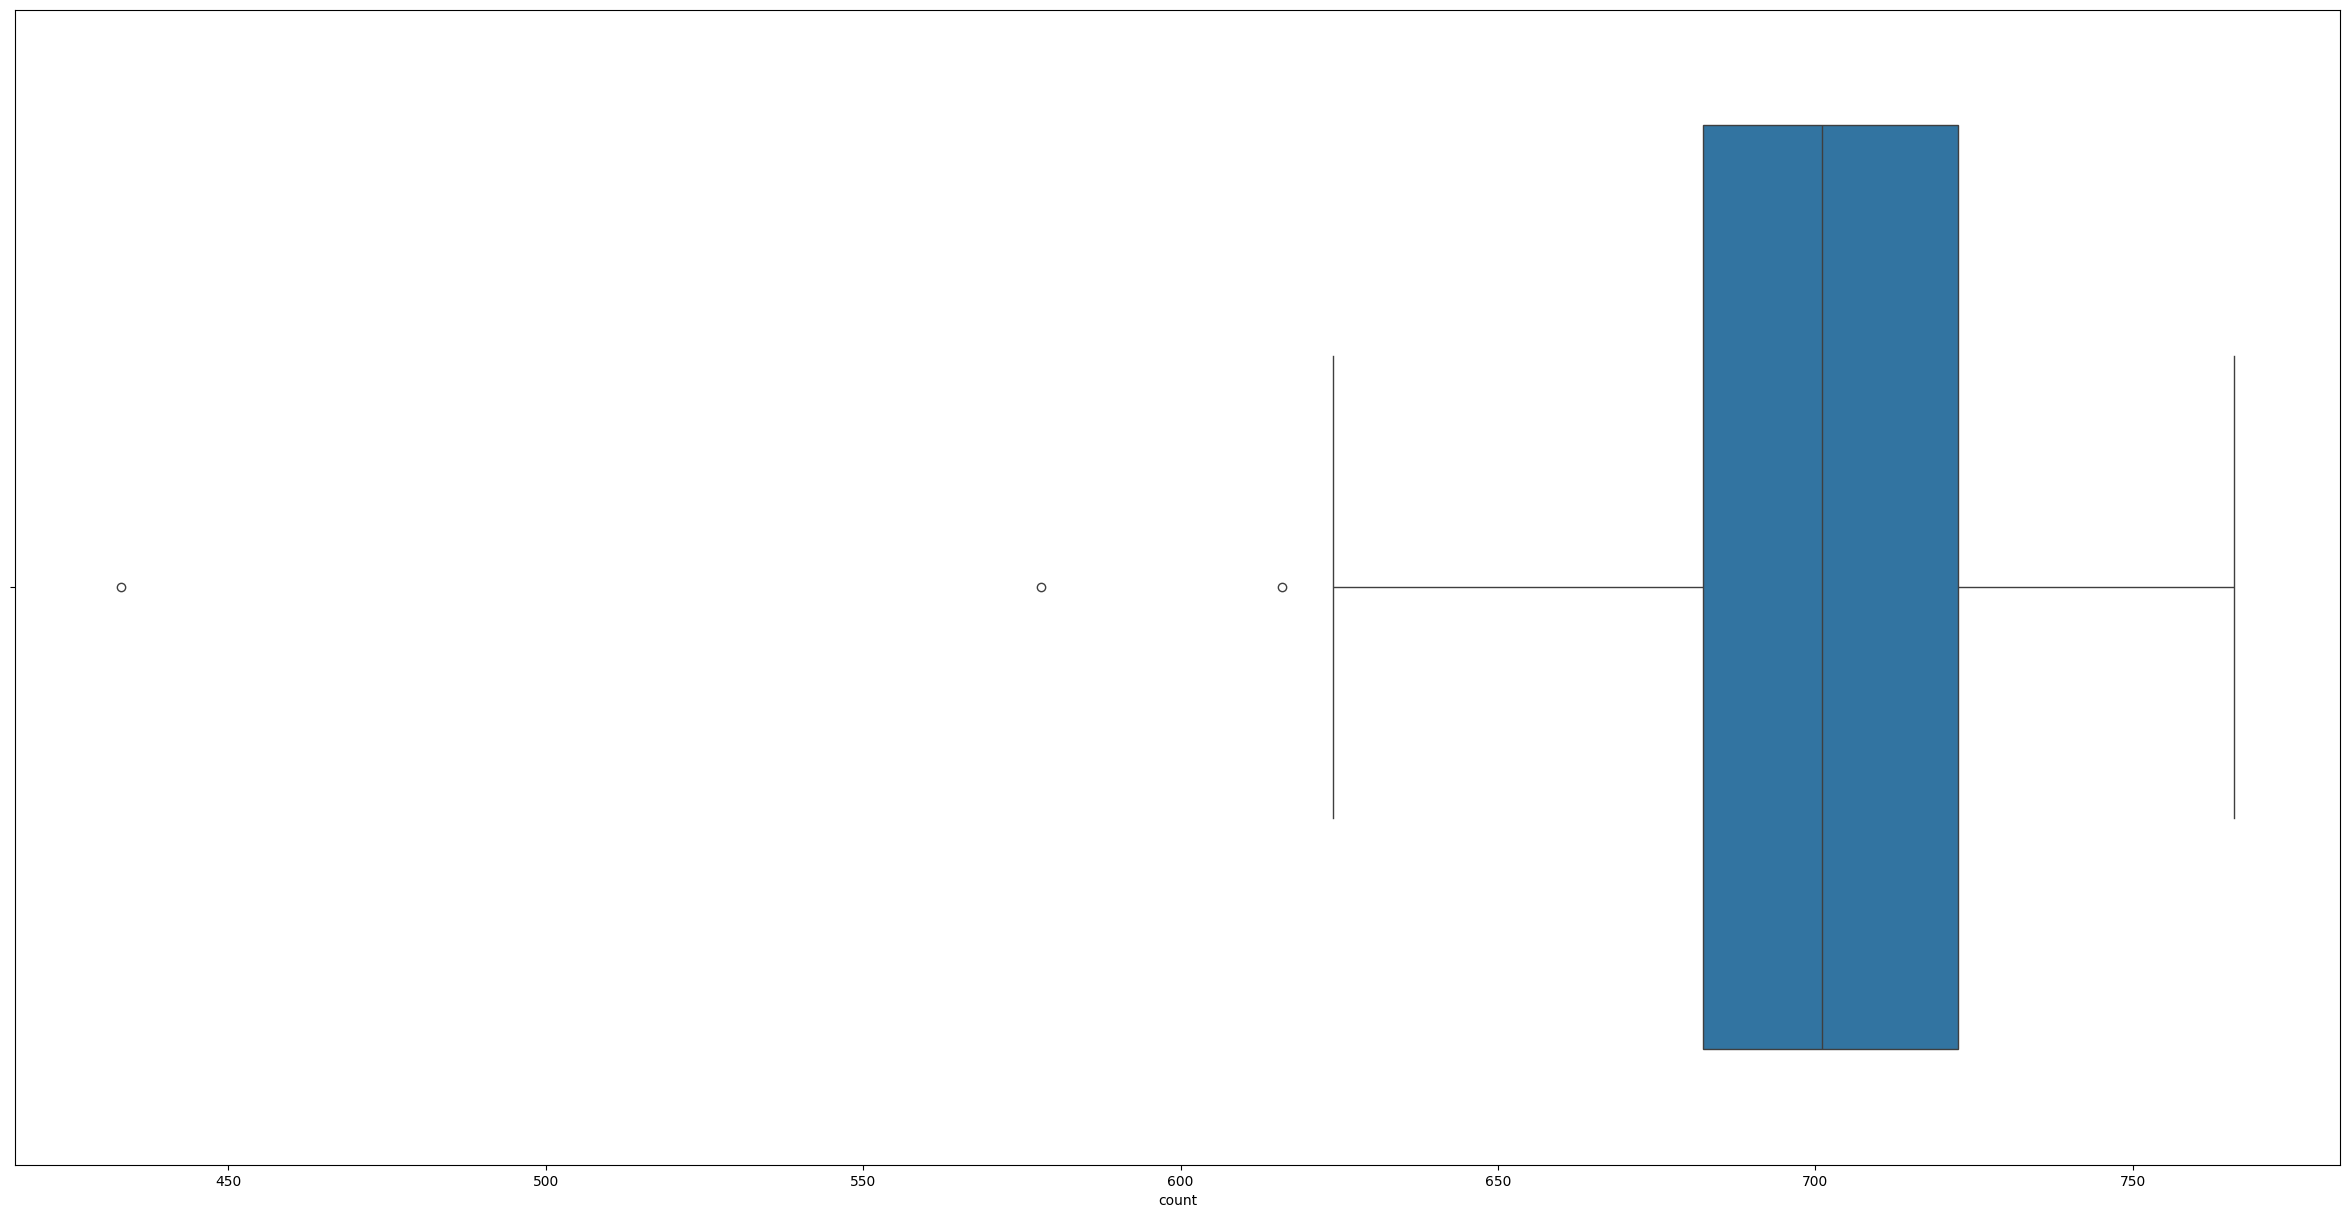

In [ ]:
# visualize the letter value count
d= data2['letter'].value_counts()
sns.boxplot(x=d)
plt.show()

In [ ]:
data3 = data2.drop('letter', axis=1)
correlation = data3.corr()

In [ ]:
data2 = pd.DataFrame(data3)
correlation = data3.corr()
correlation.style.background_gradient(cmap='BrBG')

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
xbox,1.000000,0.748362,0.829605,0.642565,0.564778,-0.045073,0.028631,0.008651,0.029206,0.129227,0.031936,-0.044722,0.463695,0.092861,0.234572,-0.092619
ybox,0.748362,1.000000,0.646118,0.790499,0.507386,0.042840,-0.066102,-0.011138,0.066627,0.143203,-0.062478,-0.003794,0.252424,-0.011400,0.205421,-0.023210
width,0.829605,0.646118,1.000000,0.633211,0.734424,0.052838,-0.003471,-0.113744,0.028595,0.071276,-0.001380,-0.044686,0.543630,0.032223,0.209588,-0.106519
height,0.642565,0.790499,0.633211,1.000000,0.619714,0.043178,-0.034951,0.105662,0.012821,-0.017613,-0.009866,0.032764,0.239550,0.022680,0.286599,0.001244
onpix,0.564778,0.507386,0.734424,0.619714,1.000000,0.135631,-0.058017,-0.001888,-0.112586,-0.137996,-0.083302,-0.037891,0.627283,0.008410,0.481452,-0.047676
xbar,-0.045073,0.042840,0.052838,0.043178,0.135631,1.000000,-0.421802,-0.053796,-0.130721,0.035193,-0.406691,-0.051058,0.135094,-0.263116,0.126349,0.265455
ybar,0.028631,-0.066102,-0.003471,-0.034951,-0.058017,-0.421802,1.000000,-0.104648,-0.049344,0.138924,0.594260,-0.292967,-0.057382,0.566385,-0.108417,-0.213899
x2bar,0.008651,-0.011138,-0.113744,0.105662,-0.001888,-0.053796,-0.104648,1.000000,-0.146324,-0.303226,0.039747,0.091489,0.094805,-0.075381,0.052937,0.187719
y2bar,0.029206,0.066627,0.028595,0.012821,-0.112586,-0.130721,-0.049344,-0.146324,1.000000,0.120306,-0.043088,0.117797,-0.384926,-0.061405,0.214748,-0.061871
xybar,0.129227,0.143203,0.071276,-0.017613,-0.137996,0.035193,0.138924,-0.303226,0.120306,1.000000,0.031690,-0.128413,-0.212275,0.020065,-0.147920,-0.104298


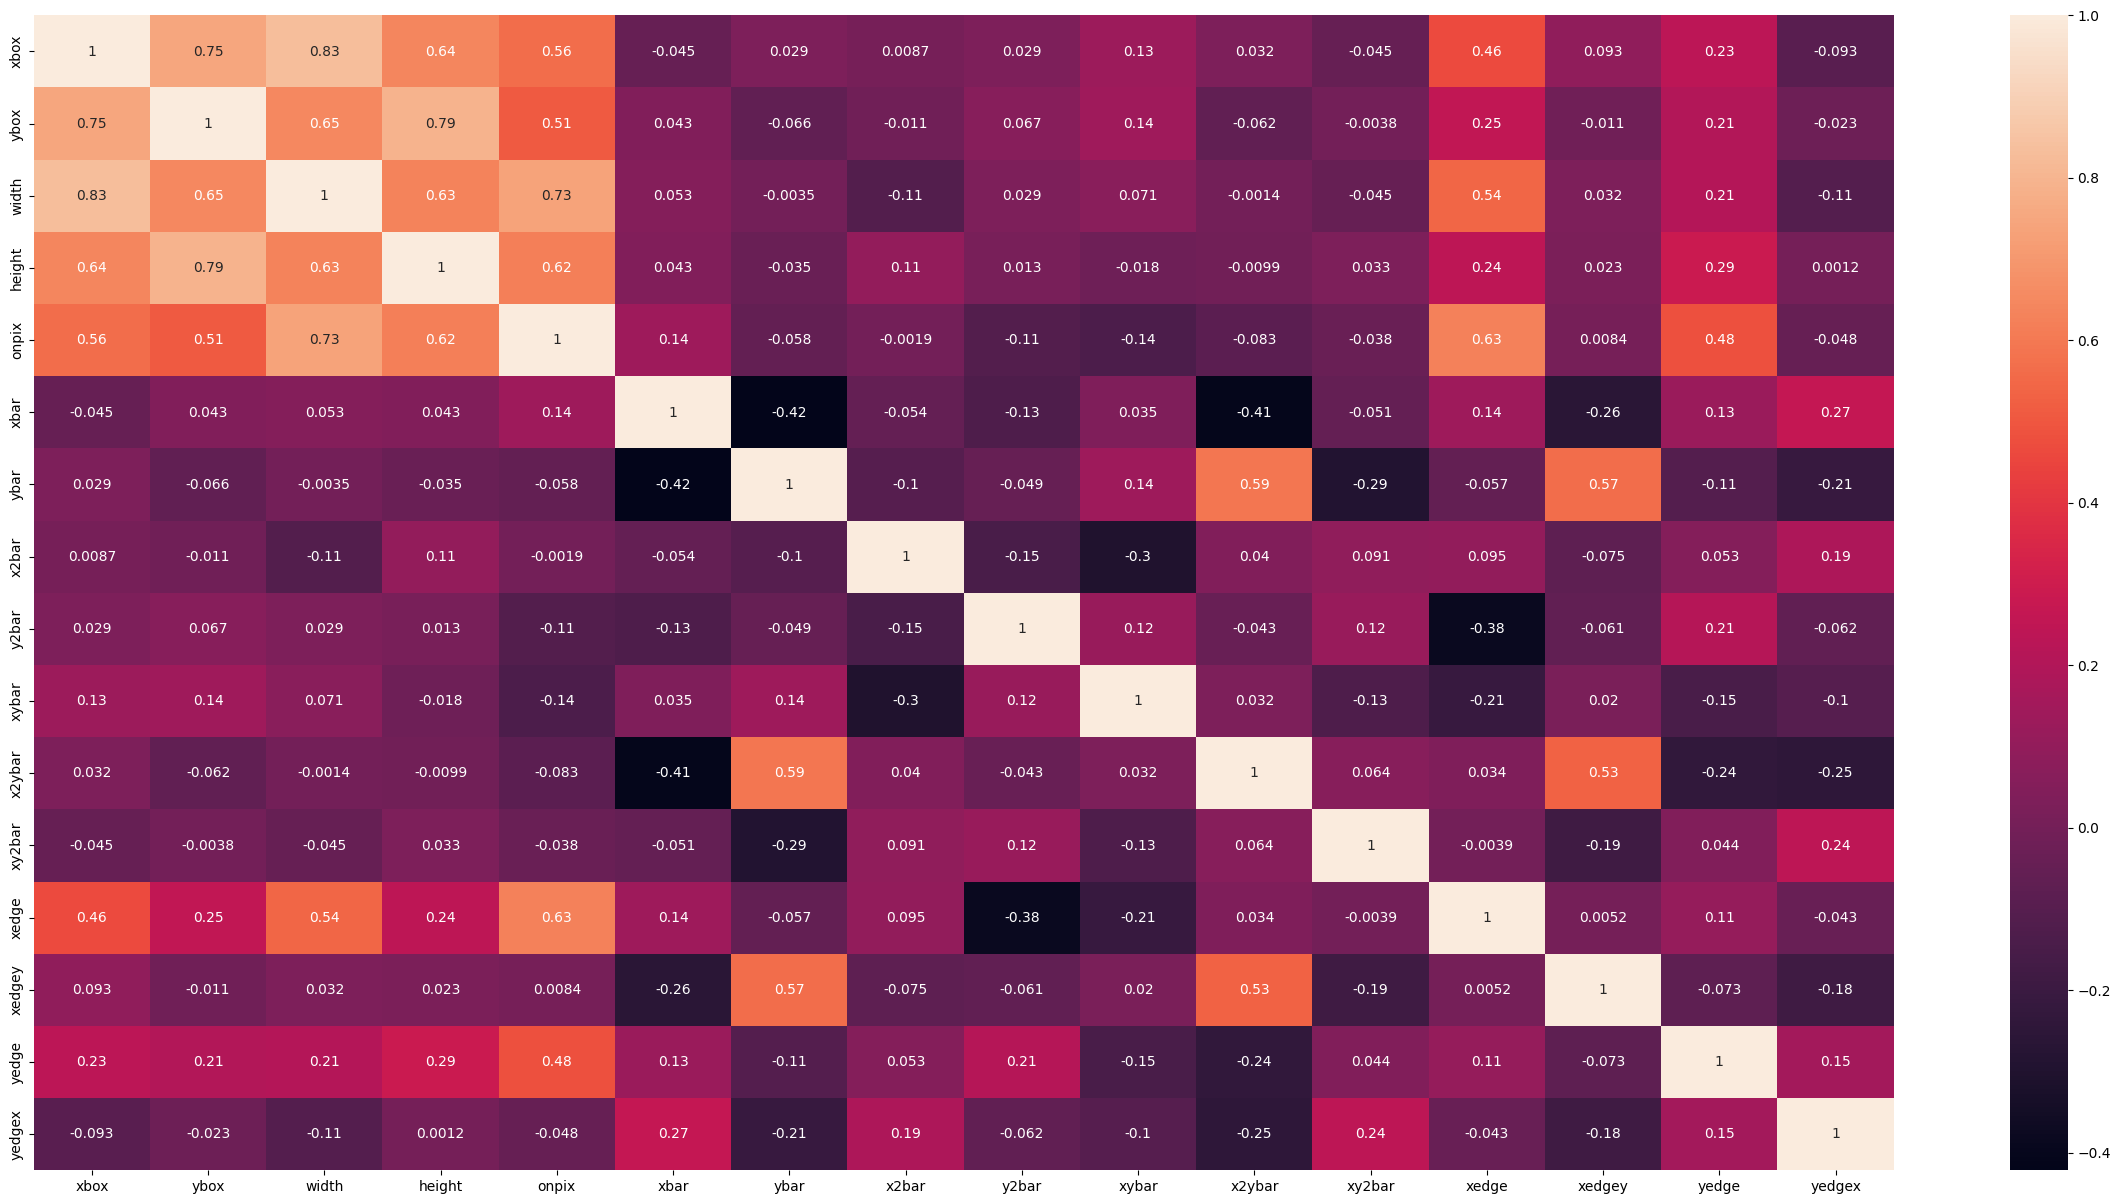

In [ ]:
# create heatmap for looking the relationship
data2 = np.random.randint(low=1,
                         high=100,
                         size=(10, 10))
# plotting the heatmap
hm = sns.heatmap(data=correlation,
                annot=True)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

# displaying the plotted heatmap
plt.show()

# Normlize the data

In [ ]:
# Import label encoder
from sklearn import preprocessing

# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'letters'.
data1['letter']= label_encoder.fit_transform(data1['letter'])

data1['letter'].unique()

<ipython-input-26-a4b336d01ddf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['letter']= label_encoder.fit_transform(data1['letter'])


array([19,  8,  3, 13,  6, 18,  1,  0,  9, 12, 23, 14, 17,  5,  2,  7, 22,
       11,  4, 21, 24, 16, 15, 20, 10, 25])

# We split the data into input X and output Y variables

In [ ]:
x = data1.iloc[:,1:17]
y = data1.iloc[:,0]

In [ ]:
x

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4


In [ ]:
y

0        19
1         8
2         3
3        13
4         6
         ..
19994    19
19995     3
19996     2
19997    19
19999     0
Name: letter, Length: 17823, dtype: int64

In [ ]:
data['letter'].unique()

array(['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R',
       'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
# Split data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# First we create the Neural Network with keras tutorial

In [ ]:
# create model
model = Sequential()
model.add(Dense(128, input_dim=16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(26, activation='softmax'))

In [ ]:
# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model
history=model.fit(X_train,y_train, validation_split=0.33, epochs=100, batch_size= 128 )

Epoch 1/100
75/75 [==============================] - 3s 21ms/step - loss: 3.1125 - accuracy: 0.1148 - val_loss: 2.6057 - val_accuracy: 0.2731
Epoch 2/100
75/75 [==============================] - 1s 10ms/step - loss: 2.1391 - accuracy: 0.4152 - val_loss: 1.7329 - val_accuracy: 0.5344
Epoch 3/100
75/75 [==============================] - 1s 10ms/step - loss: 1.5123 - accuracy: 0.6040 - val_loss: 1.3497 - val_accuracy: 0.6351
Epoch 4/100
75/75 [==============================] - 1s 9ms/step - loss: 1.2438 - accuracy: 0.6715 - val_loss: 1.1545 - val_accuracy: 0.6895
Epoch 5/100
75/75 [==============================] - 1s 7ms/step - loss: 1.1088 - accuracy: 0.7094 - val_loss: 1.0389 - val_accuracy: 0.7210
Epoch 6/100
75/75 [==============================] - 0s 6ms/step - loss: 1.0237 - accuracy: 0.7244 - val_loss: 0.9812 - val_accuracy: 0.7261
Epoch 7/100
75/75 [==============================] - 1s 9ms/step - loss: 0.9586 - accuracy: 0.7393 - val_loss: 0.9188 - val_accuracy: 0.7454
Epoch 8/10

In [ ]:
# evaluate the model
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

557/557 [==============================] - 1s 2ms/step - loss: 0.2462 - accuracy: 0.9253
accuracy: 92.53%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Define expected unique labels (based on your previous output)
expected_labels = ['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R', 'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z']

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred_encoded = np.argmax(y_pred_prob, axis=1)

# Convert predicted labels back to original letters using inverse_transform
y_test_pred = label_encoder.inverse_transform(y_test)
y_pred_letters = label_encoder.inverse_transform(y_pred_encoded)

112/112 [==============================] - 1s 3ms/step


In [ ]:
# Generate classification report
report = classification_report(y_test_pred, y_pred_letters, target_names=expected_labels)

# Print classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           T       0.95      0.98      0.96       151
           I       0.84      0.90      0.87       134
           D       0.91      0.92      0.92       115
           N       0.90      0.84      0.87       148
           G       0.86      0.86      0.86       147
           S       0.87      0.90      0.88       147
           B       0.84      0.84      0.84       141
           A       0.83      0.79      0.81       143
           J       0.82      0.90      0.86        77
           M       0.93      0.94      0.94       156
           X       0.85      0.92      0.88       131
           O       0.90      0.90      0.90       125
           R       0.94      0.97      0.95       143
           F       0.95      0.86      0.90       121
           C       0.84      0.94      0.89       132
           H       0.95      0.91      0.93       131
           W       0.95      0.90      0.92       157
    

As per the above results we got F1 score(0.89) above 85 , the model is performing well for all the classes

1.   List item
2.   List item



# Build the neural network using two hidden layers

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train,y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
357/357 [==============================] - 3s 4ms/step - loss: 2.1992 - accuracy: 0.3715 - val_loss: 1.3227 - val_accuracy: 0.6129
Epoch 2/50
357/357 [==============================] - 1s 3ms/step - loss: 1.1511 - accuracy: 0.6663 - val_loss: 1.0237 - val_accuracy: 0.7090
Epoch 3/50
357/357 [==============================] - 2s 5ms/step - loss: 0.9326 - accuracy: 0.7287 - val_loss: 0.8673 - val_accuracy: 0.7395
Epoch 4/50
357/357 [==============================] - 2s 6ms/step - loss: 0.8057 - accuracy: 0.7621 - val_loss: 0.7315 - val_accuracy: 0.7830
Epoch 5/50
357/357 [==============================] - 2s 5ms/step - loss: 0.7205 - accuracy: 0.7810 - val_loss: 0.6890 - val_accuracy: 0.7917
Epoch 6/50
357/357 [==============================] - 1s 4ms/step - loss: 0.6594 - accuracy: 0.7984 - val_loss: 0.6977 - val_accuracy: 0.7802
Epoch 7/50
357/357 [==============================] - 1s 4ms/step - loss: 0.6034 - accuracy: 0.8182 - val_loss: 0.5540 - val_accuracy: 0.8310
Epoch 

In [ ]:
# evaluate the model
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

557/557 [==============================] - 1s 2ms/step - loss: 0.1775 - accuracy: 0.9426
accuracy: 94.26%


# Define expected unique labels (based on your previous output)

In [ ]:
expected_labels = ['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R', 'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z']

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred_encoded = np.argmax(y_pred_prob, axis=1)

# Convert predicted labels back to original letters using inverse_transform
y_test_pred = label_encoder.inverse_transform(y_test)
y_pred_letters = label_encoder.inverse_transform(y_pred_encoded)

112/112 [==============================] - 0s 3ms/step


In [ ]:
# Generate classification report
report = classification_report(y_test_pred, y_pred_letters, target_names=expected_labels)

# Print classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           T       1.00      0.96      0.98       151
           I       0.84      0.93      0.88       134
           D       0.93      0.91      0.92       115
           N       0.88      0.92      0.90       148
           G       0.91      0.90      0.91       147
           S       0.89      0.93      0.91       147
           B       0.90      0.91      0.90       141
           A       0.83      0.78      0.81       143
           J       0.84      0.91      0.88        77
           M       0.95      0.92      0.94       156
           X       0.90      0.85      0.87       131
           O       0.93      0.95      0.94       125
           R       0.95      0.99      0.97       143
           F       0.98      0.87      0.92       121
           C       0.97      0.84      0.90       132
           H       0.98      0.95      0.96       131
           W       0.93      0.96      0.95       157
    

# Hyper Parameter Tuning

In [ ]:
!pip install keras==2.12.0
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
def create_model(optimizer='adam', activation='relu', neurons=64, hidden_layers=1):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation=activation))

    model.add(Dense(26, activation='sigmoid'))

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create KerasClassifier based on the create_model function
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define hyperparameters grid for GridSearchCV
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'neurons': [32, 64, 128],
    'hidden_layers': [1, 2]
}

# Define accuracy as the scoring metric for GridSearchCV
scoring = {'accuracy': make_scorer(accuracy_score)}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, refit='accuracy', cv=3)
grid_result = grid_search.fit(X_train, y_train)


<ipython-input-44-72ec7337eb1a>:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


149/149 [==============================] - 0s 2ms/step


In [ ]:
# Print best hyperparameters and corresponding accuracy
print("Best Accuracy: {:.4f}".format(grid_result.best_score_))
print("Best Parameters:", grid_result.best_params_)

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.4f}".format(test_accuracy))

Best Accuracy: 0.6483
Best Parameters: {'activation': 'tanh', 'hidden_layers': 2, 'neurons': 128, 'optimizer': 'adam'}
112/112 [==============================] - 1s 4ms/step
Test Accuracy: 0.7091


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       151
           1       0.65      0.63      0.64       134
           2       0.90      0.69      0.78       115
           3       0.61      0.84      0.71       148
           4       0.67      0.61      0.64       147
           5       0.83      0.53      0.65       147
           6       0.85      0.45      0.59       141
           7       0.59      0.57      0.58       143
           8       0.75      0.71      0.73        77
           9       0.76      0.83      0.80       156
          10       0.79      0.61      0.69       131
          11       0.88      0.72      0.79       125
          12       0.77      0.91      0.84       143
          13       0.78      0.63      0.70       121
          14       0.69      0.81      0.75       132
          15       0.71      0.79      0.74       131
          16       0.59      0.75      0.66       157
          17       0.66    

## Training model with optimum values of Hyperparameters

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(8, input_dim=16, kernel_initializer='uniform', activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(8, input_dim=16, kernel_initializer='uniform', activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='softmax'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# Create the model
model = KerasClassifier(build_fn=create_model, verbose=0, batch_size=20, epochs=10)
model.fit(X_train, y_train)

<ipython-input-69-ee60b37eca04>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0, batch_size=20, epochs=10)


In [ ]:
# prediction the model
y_predict = model.predict(X_test)

112/112 [==============================] - 0s 2ms/step


In [ ]:
# print the metrics
y_predict = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", y_predict)

Test Accuracy:  0.7091164095371669


# We perform Classification Using Artificial Neural Networks with Hyperparameter Tuning on Alphabets Data